<a href="https://colab.research.google.com/github/chindimaga/Learning-Content/blob/master/regression_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !wget "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# !wget "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
# !wget "https://www.sciencedirect.com/science/article/pii/S0167923609001377/pdfft?isDTMRedir=true&download=true"
# ## Link to paper that published this dataset :  https://reader.elsevier.com/reader/sd/pii/S0167923609001377?token=575E8254AB1294C5423422E33CCB3AF9634BF569E3DE21DEE2CB0B05EB613B307CC8F9DC64FCE91767615C7346131C9C


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

plt.ion()#for graphs to be dynamic
style.use('ggplot')#for graphs to look cool

In [0]:
#Import dataset
white_dataset = pd.read_csv('winequality-white.csv',header=0,sep=';')

In [0]:
input_data = white_dataset.iloc[:,:-1]

In [0]:
output_data = white_dataset.iloc[:,-1]

In [0]:
X=np.array(input_data)
Y=np.array(output_data)

In [0]:
Y=Y.reshape(-1,1)# this is important.. may be sourse of error

In [7]:
Y.shape

(4898, 1)

In [8]:
Y

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]])

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

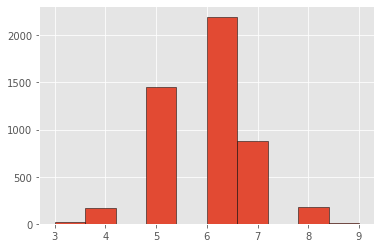

In [9]:
plt.hist(Y,edgecolor='black')

In [10]:
mu = np.mean(X,axis=0)
print(mu)

[6.85478767e+00 2.78241119e-01 3.34191507e-01 6.39141486e+00
 4.57723561e-02 3.53080849e+01 1.38360657e+02 9.94027376e-01
 3.18826664e+00 4.89846876e-01 1.05142670e+01]


In [11]:
mu.shape

(11,)

In [0]:
mu=mu.reshape(1,11)

In [0]:
X=X-mu

In [14]:
X.shape

(4898, 11)

In [15]:
X

array([[ 1.45212332e-01, -8.24111882e-03,  2.58084933e-02, ...,
        -1.88266639e-01, -3.98468763e-02, -1.71426705e+00],
       [-5.54787668e-01,  2.17588812e-02,  5.80849326e-03, ...,
         1.11733361e-01,  1.53123724e-04, -1.01426705e+00],
       [ 1.24521233e+00,  1.75888118e-03,  6.58084933e-02, ...,
         7.17333606e-02, -4.98468763e-02, -4.14267048e-01],
       ...,
       [-3.54787668e-01, -3.82411188e-02, -1.44191507e-01, ...,
        -1.98266639e-01, -2.98468763e-02, -1.11426705e+00],
       [-1.35478767e+00,  1.17588812e-02, -3.41915067e-02, ...,
         1.51733361e-01, -1.09846876e-01,  2.28573295e+00],
       [-8.54787668e-01, -6.82411188e-02,  4.58084933e-02, ...,
         7.17333606e-02, -1.69846876e-01,  1.28573295e+00]])

In [0]:
X = X/np.std(X,axis=0)

In [0]:
def split_dataset(x,y,fraction=0.5):
  xtrain=[]
  ytrain=[]
  xtest=[]
  ytest=[]
  testlen=int(fraction*x.shape[0])
  randomindex = np.random.randint(0,X.shape[0]-testlen)
  xtest = x[randomindex:randomindex+testlen]
  ytest = y[randomindex:randomindex+testlen]
  xtrain = np.concatenate((x[:randomindex,:],x[randomindex+testlen:,:]))
  ytrain = np.concatenate((y[:randomindex,0],y[randomindex+testlen:,0]))
  return xtrain,ytrain,xtest,ytest

In [0]:
X_train,Y_train,X_test,Y_test=split_dataset(X,Y,0.3)

In [19]:
print(X_train.shape)
Y_train=Y_train.reshape(-1,1)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3429, 11)
(3429, 1)
(1469, 11)
(1469, 1)


In [0]:
class linear_regresser():
  #initialize
  def __init__(self,inputsize,epochs=20,learning_rate=0.1,batch_size=256):
    self.lr = learning_rate
    self.batch_size = batch_size
    self.inputsize = inputsize
    self.epochs = epochs
    self.weights = np.random.randn(self.inputsize,1)
    self.bias = 0.0
  #forward
  def forward(self,x,y):
    outputs=np.dot(x,self.weights)+self.bias
    self.error=outputs-y
    return outputs
  #mse_loss
  def mse_error(self):
    return np.mean(np.square(self.error))

  #compute_gradient
  def compute_gradient(self,x):
    self.w_gradients = (np.dot(np.transpose(x),self.error)/x.shape[0]).reshape(-1,1)
    self.bias_gradient = np.mean(self.error)
  #update
  def update(self):
    self.weights = self.weights - self.lr * self.w_gradients
    self.bias -= self.lr*(self.bias_gradient)
  #shuffel
  def shuffle(self,x,y):
        length = len(y)
        indices = np.arange(length)
        np.random.shuffle(indices)
        return x[indices],y[indices]
  #train
  def train(self,x,y):
    for e in range(self.epochs):
      losses = []
      #shuffel
      x2,y2=self.shuffle(x,y)
      for st_in in range(0,len(x),self.batch_size):
        en_in = st_in + self.batch_size
        x_batch = x2[st_in:en_in]
        y_batch = y2[st_in:en_in]
        pred = self.forward(x_batch,y_batch)
        losses.append(self.mse_error())
        self.compute_gradient(x_batch)
        self.update()
      print("epoch: ",e)
      print("loss:",np.mean(losses))  
  #test
  def test(self,x,y,tau):
    #tau decides the error allowed
    losses=[]
    correct=0
    for st_in in range(0,len(y),self.batch_size):
      end_in = min(len(y),st_in+self.batch_size)
      x_batch = x[st_in:end_in]
      y_batch = y[st_in:end_in]
      pred = self.forward(x_batch,y_batch)
      losses.append(self.mse_error())  
      for err in self.error:
        if abs(err)<=tau:
          correct+=1
    print("Mean Squared Error :",np.mean(losses))
    print("Accuracy over test set :",round(correct/len(y),3))

In [0]:
model1=linear_regresser(11)

In [22]:
model1.train(X_train,Y_train)

epoch:  0
loss: 15.936564706155506
epoch:  1
loss: 1.4166658868753785
epoch:  2
loss: 0.7174457753993716
epoch:  3
loss: 0.641519390733902
epoch:  4
loss: 0.6208648831278369
epoch:  5
loss: 0.6156548480098475
epoch:  6
loss: 0.6229598916858408
epoch:  7
loss: 0.6159098670707133
epoch:  8
loss: 0.610255402231796
epoch:  9
loss: 0.6075838686911931
epoch:  10
loss: 0.6103777404458798
epoch:  11
loss: 0.6122691466419096
epoch:  12
loss: 0.6100094281131752
epoch:  13
loss: 0.6012375104157474
epoch:  14
loss: 0.6171794865701148
epoch:  15
loss: 0.5978112504257417
epoch:  16
loss: 0.6090939987944786
epoch:  17
loss: 0.5992036011220316
epoch:  18
loss: 0.6121789971650891
epoch:  19
loss: 0.6075384142583656


In [23]:
model1.test(X_test,Y_test,1)

Mean Squared Error : 0.5410995028018554
Accuracy over test set : 0.851
